## Importing Libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
import cv2
import colorsys

## Loading Images

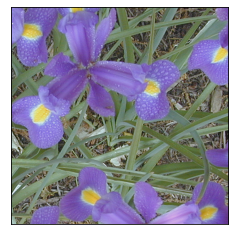

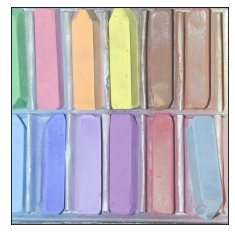

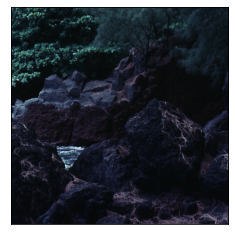

In [44]:
img1 = iio.imread('P5_1.tif')
img2 = iio.imread('P5_2.tif')
img3 = iio.imread('P5_3.tif')

def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        iio.imwrite(name, img)
    plt.show()
    
show_image(img1)
show_image(img2)
show_image(img3)

## Histogram Equalization on Every RGB Channel

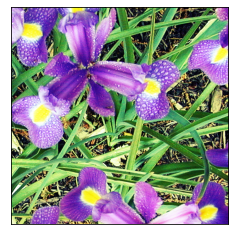

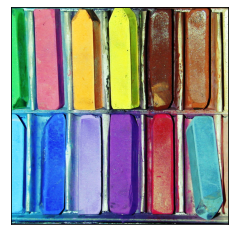

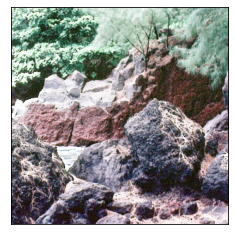

In [45]:
def hist_equal_rgb(img):
    he_img = img.copy()
    for i in range(img.shape[2]):
        he_img[:,:,i] = cv2.equalizeHist(img[:,:,i])
    return he_img

show_image(hist_equal_rgb(img1), save=True, name='P1_1.jpg')
show_image(hist_equal_rgb(img2), save=True, name='P2_1.jpg')
show_image(hist_equal_rgb(img3), save=True, name='P3_1.jpg')

## Histogram Equalization for P5_3.tif

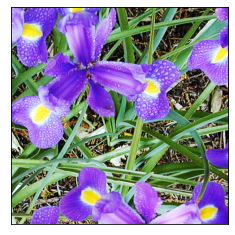

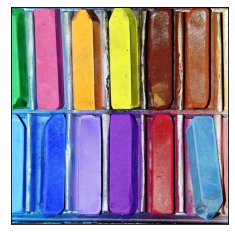

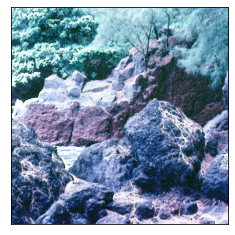

In [46]:
def histogram_equalization(img):
    
    r, g, b = img[:,:,0].copy(), img[:,:,1].copy(), img[:,:,2].copy()
    
    r_hist, _ = np.histogram(r.flatten(), bins=256, density=True, range=(0, 255))
    g_hist, _ = np.histogram(g.flatten(), bins=256, density=True, range=(0, 255))
    b_hist, _ = np.histogram(b.flatten(), bins=256, density=True, range=(0, 255))
    
    hist = (r_hist + g_hist + b_hist) / 3
    
    # assuming pixel with value x transforms to a new value called y
    x = np.linspace(0, 255, 256)
    y = np.zeros(x.shape)
    for i in range(256):
        y[i] = np.round(255*np.sum(hist[:i+1]))
        if y[i] == 256:
            y[i] = 255
    
    x = np.uint8(x)
    y = np.uint8(y)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r[i,j] = y[r[i,j]]
            g[i,j] = y[g[i,j]]
            b[i,j] = y[b[i,j]]
    
    return np.dstack((r, g, b))
    
    
    
show_image(histogram_equalization(img1), save=True, name='P1_2.jpg')
show_image(histogram_equalization(img2), save=True, name='P2_2.jpg')
show_image(histogram_equalization(img3), save=True, name='P3_2.jpg')

## Histogram Equalization in Other Spaces

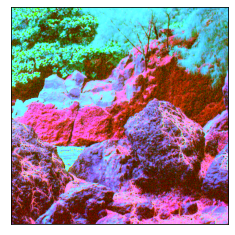

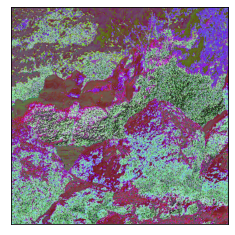

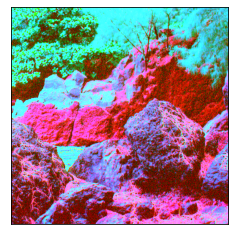

In [56]:
def hist_equal_yuv(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    he_img = hist_equal_rgb(img_yuv)
    return cv2.cvtColor(he_img, cv2.COLOR_YUV2RGB)

def hist_equal_yiq(img):
    img_yiq = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            Y, I, Q = colorsys.rgb_to_yiq(img[i,j,0], img[i,j,1], img[i,j,2])
            img_yiq[i,j,0] = Y
            img_yiq[i,j,1] = I
            img_yiq[i,j,2] = Q
    he_img = hist_equal_rgb(img_yiq)
    out = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            R, G, B = colorsys.rgb_to_yiq(he_img[i,j,0], he_img[i,j,1], he_img[i,j,2])
            out[i,j,0] = R
            out[i,j,1] = G
            out[i,j,2] = B
    return out

def hist_equal_ycbcr(img):
    img_ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    he_img = hist_equal_rgb(img_ycbcr)
    return cv2.cvtColor(he_img, cv2.COLOR_YCrCb2RGB)

show_image(hist_equal_yuv(img3), save=True, name='P3_yuv.jpg')
show_image(hist_equal_yiq(img3), save=True, name='P3_yiq.jpg')
show_image(hist_equal_ycbcr(img3), save=True, name='P3_ycbcr.jpg')